In [1]:
import pandas as pd
import nasdaqdatalink
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from lib.nasdaq import Fundamentals, Tickers
from lib.equity.fundamentals import peer_percentiles

from lib.calendar import Calendar
cal = Calendar()

pd.options.display.float_format = '{:,.4f}'.format

In [3]:
ticker = 'AAPL'

In [4]:
query = Tickers().get()

Tickers data has been updated today - reading from file


In [5]:
fun = Fundamentals(calendardate=cal.previous_quarter_end())
raw = query.merge(fun.get(), how='left', on='ticker')

Today: 2022-08-18 21:42:04.987568


## Percentile Ranks

In [6]:
ticker_data = query[query.ticker == ticker]
industry = ticker_data['industry'].iloc[0]
sector = ticker_data['sector'].iloc[0]

In [19]:
sector, industry

('Technology', 'Consumer Electronics')

In [7]:
unique_sectors_list, unique_industries_list, sector_percentile_frames, sector_rank_frames , industry_percentile_frames, industry_rank_frames = peer_percentiles.fundamental_peer_percentiles()

Tickers data has been updated today - reading from file
Today: 2022-08-18 21:42:11.964560
*****[ERROR]***** zero-size array to reduction operation maximum which has no identity
*****[ERROR]***** zero-size array to reduction operation maximum which has no identity
*****[ERROR]***** zero-size array to reduction operation maximum which has no identity


In [8]:
box_cols = [ 'ticker','roe','roc', 'roa', 'pe','opp margin']

### Sector

In [9]:
percentiles = sector_percentile_frames.get(sector)
percentiles[ ['index'] + box_cols[1:]]

,index,roe,roc,roa,pe,opp margin
0,low,-0.28,-0.19,-0.14,-53.65,-1.14
1,Q1,-0.09,-0.06,-0.05,-10.93,-0.40
2,median,-0.01,-0.01,-0.01,-1.34,-0.05
3,Q3,0.04,0.02,0.02,18.19,0.10
4,high,0.17,0.14,0.10,61.15,0.75


In [10]:
ranks = sector_rank_frames.get(sector)
ranks = ranks.loc[ranks.ticker == ticker]
ranks[ ['ticker'] + box_cols[1:]]

,ticker,roe,roc,roa,pe,opp margin
12,AAPL,0.97,0.98,0.97,0.80,0.94


In [11]:
sector_raw = raw[box_cols].loc[raw.sector == sector].dropna()

In [12]:
this_ticker =sector_raw[box_cols].loc[sector_raw.ticker == ticker] 
this_ticker

,ticker,roe,roc,roa,pe,opp margin
13,AAPL,0.3346,0.1093,0.0578,23.0120,0.2800


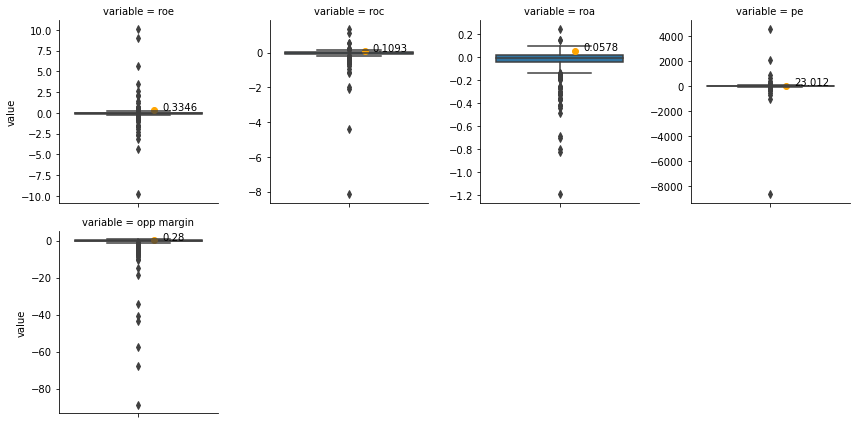

In [13]:
melt = sector_raw.melt(id_vars = 'ticker').dropna()

def annotate(data, **kws):
    n = np.round(data.value.loc[data.ticker==ticker].values[0], 4)
    ax = plt.gca()
    ax.text(.15, n, f"{n}")
    ax.scatter(.1, n, color = 'orange')
        
g = sns.FacetGrid(melt, col="variable", sharey=False,  col_wrap=4)
g.map_dataframe(sns.boxplot, y="value")
g.map_dataframe(annotate)

### Industry

In [14]:
percentiles = industry_percentile_frames.get(industry)
percentiles[ ['index'] + box_cols[1:]]

,index,roe,roc,roa,pe,opp margin
0,low,-0.26,-0.07,-0.05,-26.10,-0.39
1,Q1,-0.14,-0.04,-0.03,-20.89,-0.29
2,median,-0.03,-0.00,-0.00,-2.22,0.05
3,Q3,0.01,0.01,0.01,6.13,0.20
4,high,0.04,0.03,0.03,21.59,0.40


In [15]:
ranks = industry_rank_frames.get(industry)
ranks = ranks.loc[ranks.ticker == ticker]
ranks[ ['ticker'] + box_cols[1:]]

,ticker,roe,roc,roa,pe,opp margin
12,AAPL,1.00,1.00,1.00,1.00,1.00


In [16]:
industry_raw = raw[box_cols].loc[raw.industry == industry].dropna()

In [17]:
this_ticker =industry_raw[box_cols].loc[industry_raw.ticker == ticker] 
this_ticker

,ticker,roe,roc,roa,pe,opp margin
13,AAPL,0.3346,0.1093,0.0578,23.0120,0.2800


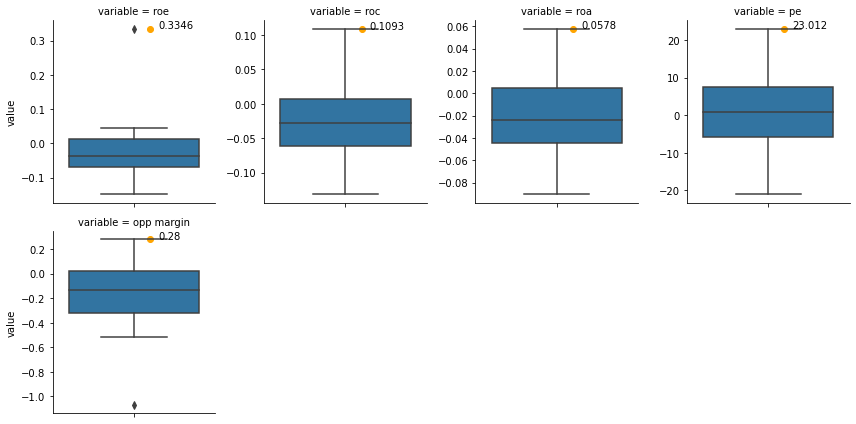

In [18]:
melt = industry_raw.melt(id_vars = 'ticker').dropna()

def annotate(data, **kws):
    n = np.round(data.value.loc[data.ticker==ticker].values[0], 4)
    ax = plt.gca()
    ax.text(.15, n, f"{n}")
    ax.scatter(.1, n, color = 'orange')
        
g = sns.FacetGrid(melt, col="variable", sharey=False,  col_wrap=4)
g.map_dataframe(sns.boxplot, y="value")
g.map_dataframe(annotate)